In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

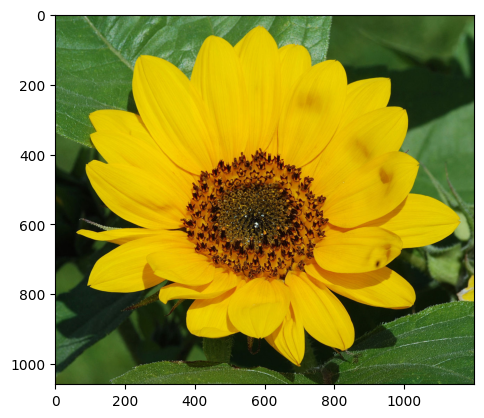

In [2]:
pic1 = plt.imread('download.jpg')
plt.imshow(pic1)

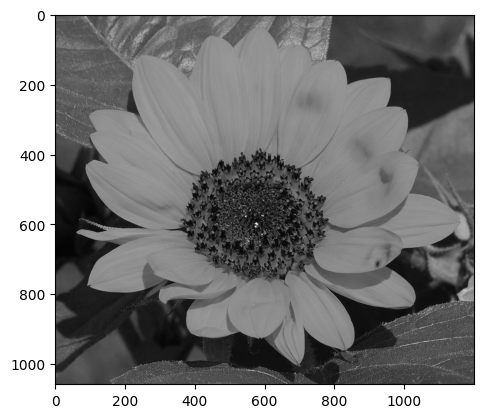

In [3]:
img = cv2.cvtColor(pic1, cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap='gray')


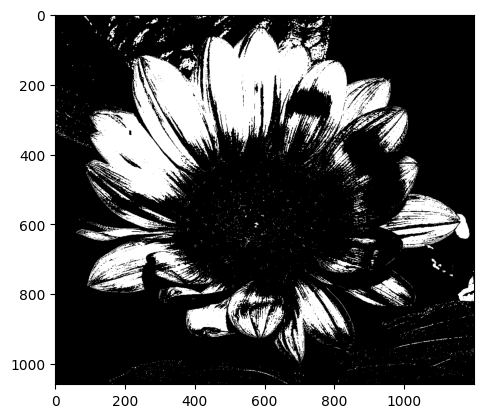

In [4]:
#Thresholding: try playing with the threshold value (144 here) to see the changes

ret, thresh1 = cv2.threshold(img, 140, 255, cv2.THRESH_BINARY)
plt.imshow(thresh1,cmap='gray')

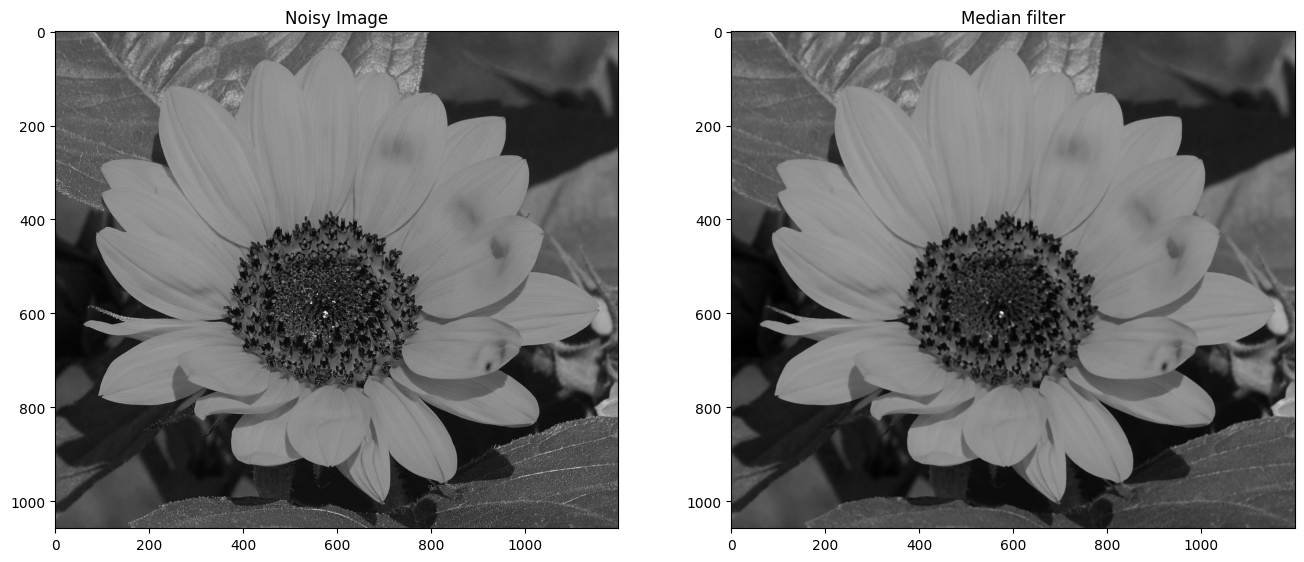

In [5]:
img = cv2.cvtColor(pic1, cv2.COLOR_BGR2GRAY)
median = cv2.medianBlur(img,5)
plt.figure(figsize=(16, 16))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Noisy Image')
plt.subplot(122),
plt.imshow(median,cmap = 'gray')
plt.title('Median filter')
plt.show()

Text(0.5, 1.0, 'smoothing with Gaussian sigma=7')

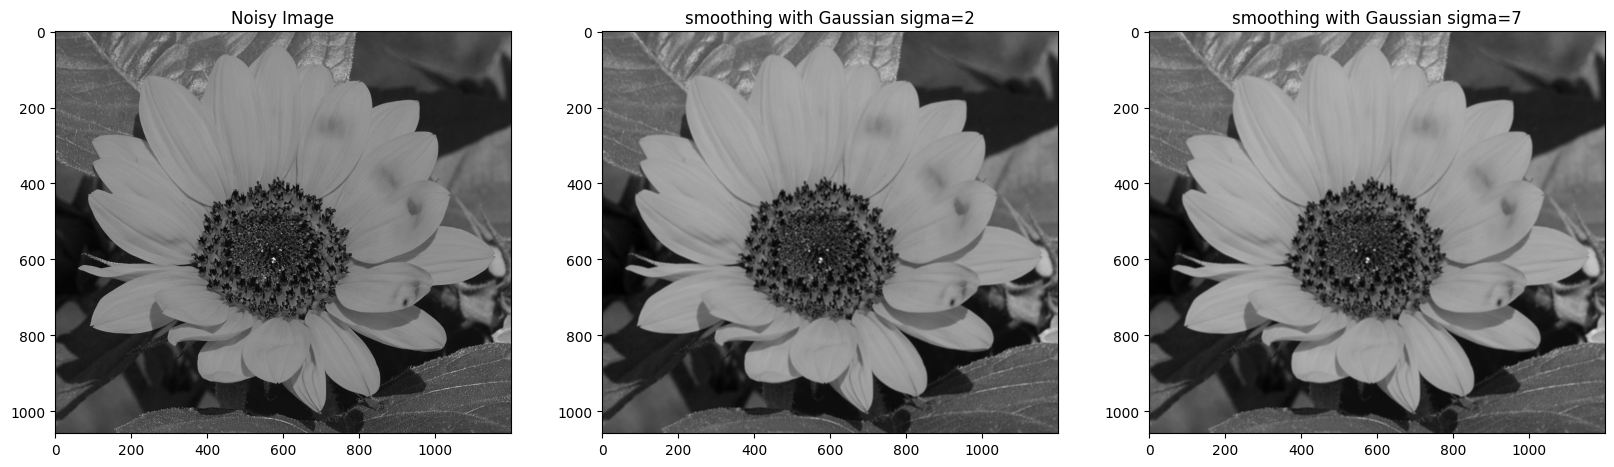

In [6]:
gaussian_blur1 = cv2.GaussianBlur(img,(5,5),2,cv2.BORDER_DEFAULT)
gaussian_blur2 = cv2.GaussianBlur(img,(5,5),7,cv2.BORDER_DEFAULT)

plt.figure(figsize=(20, 20))
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Noisy Image')

plt.subplot(1,3,2),
plt.imshow(gaussian_blur1,cmap = 'gray')
plt.title('smoothing with Gaussian sigma=2')

plt.subplot(1,3,3),
plt.imshow(gaussian_blur2,cmap = 'gray')
plt.title('smoothing with Gaussian sigma=7')

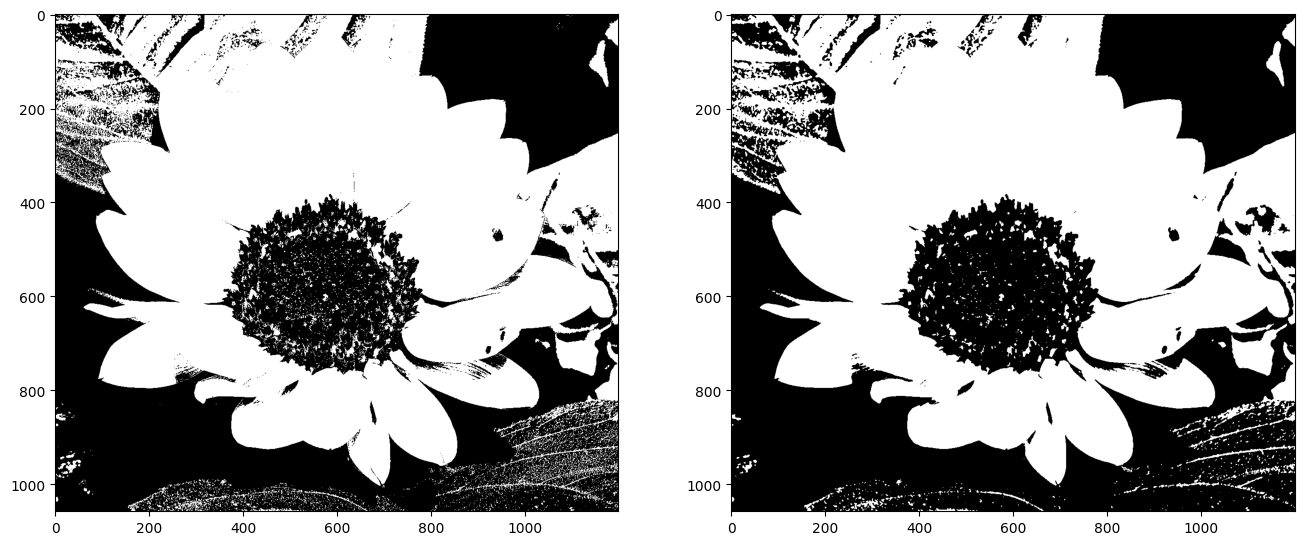

In [7]:
#Otsu's thresholding before and after Gaussian filtering
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.figure(figsize=(16, 16))
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.subplot(121)
plt.imshow(th2,cmap='gray')
plt.subplot(122)
plt.imshow(th3,cmap='gray')

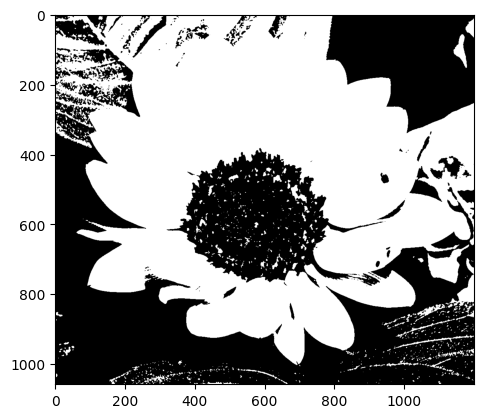

In [8]:
plt.imshow(th3,cmap='gray')

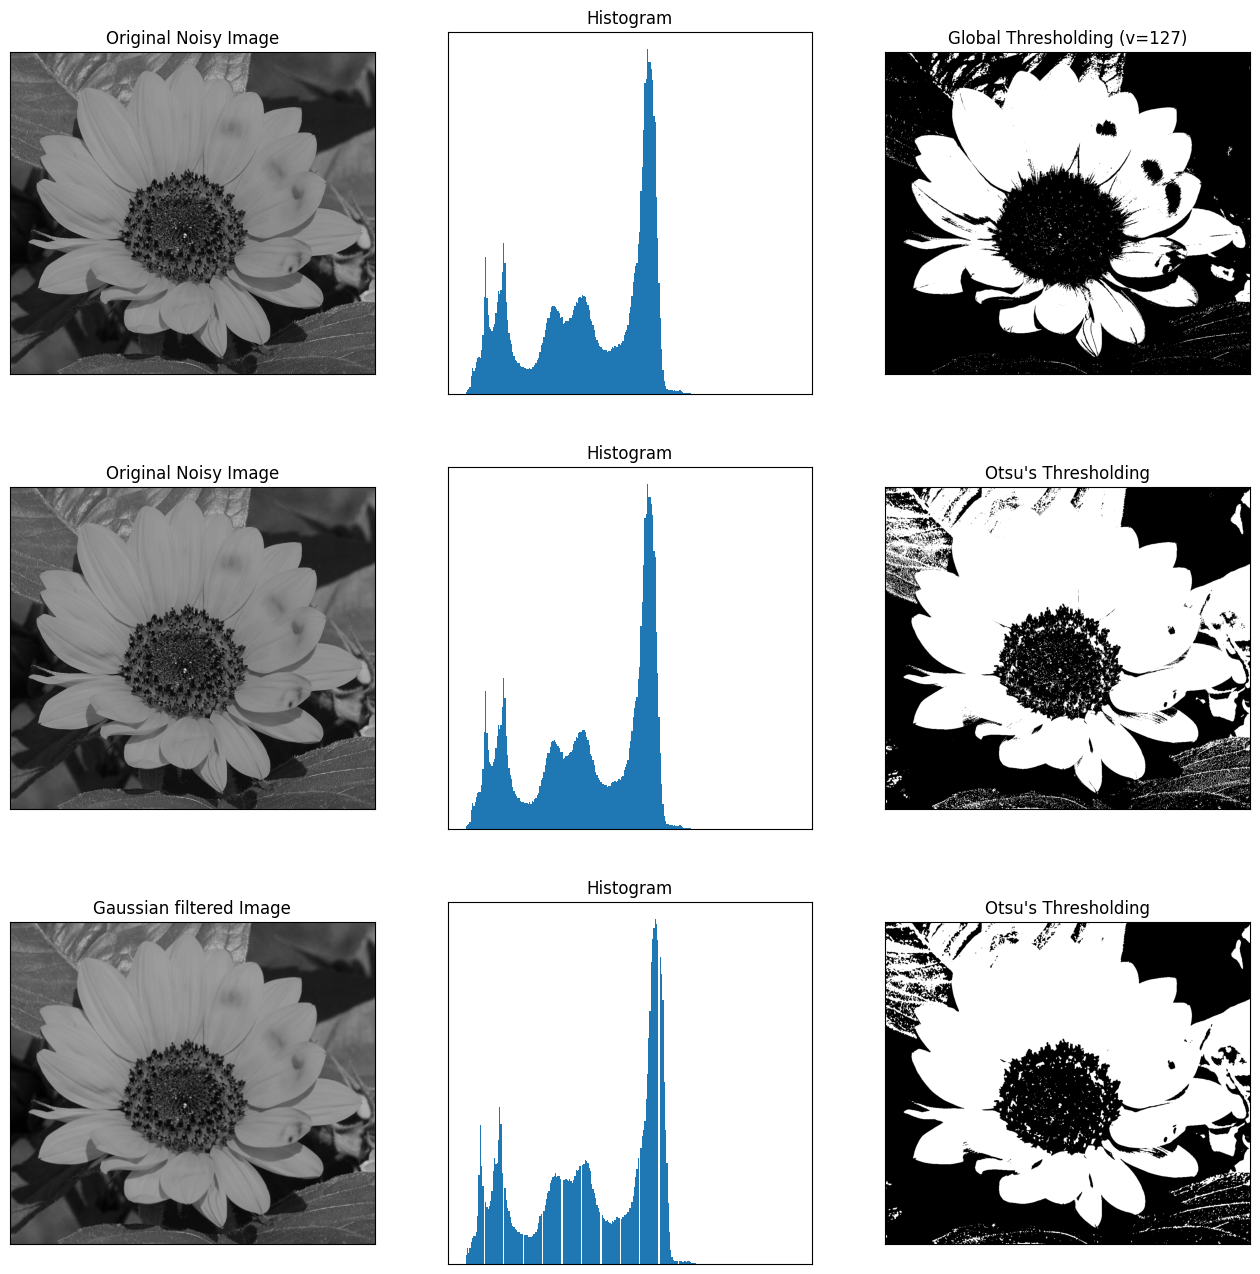

In [9]:
plt.figure(figsize=(16,16))
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

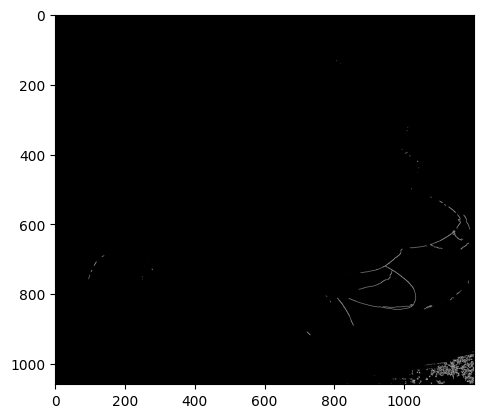

In [10]:
#Hough Line Transform
dst = cv2.Canny(img, 50, 200, None, 3)
lines = cv2.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)
# Draw the lines
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(dst, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)
cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
plt.imshow(cdst)

(-0.5, 1199.5, 1057.5, -0.5)

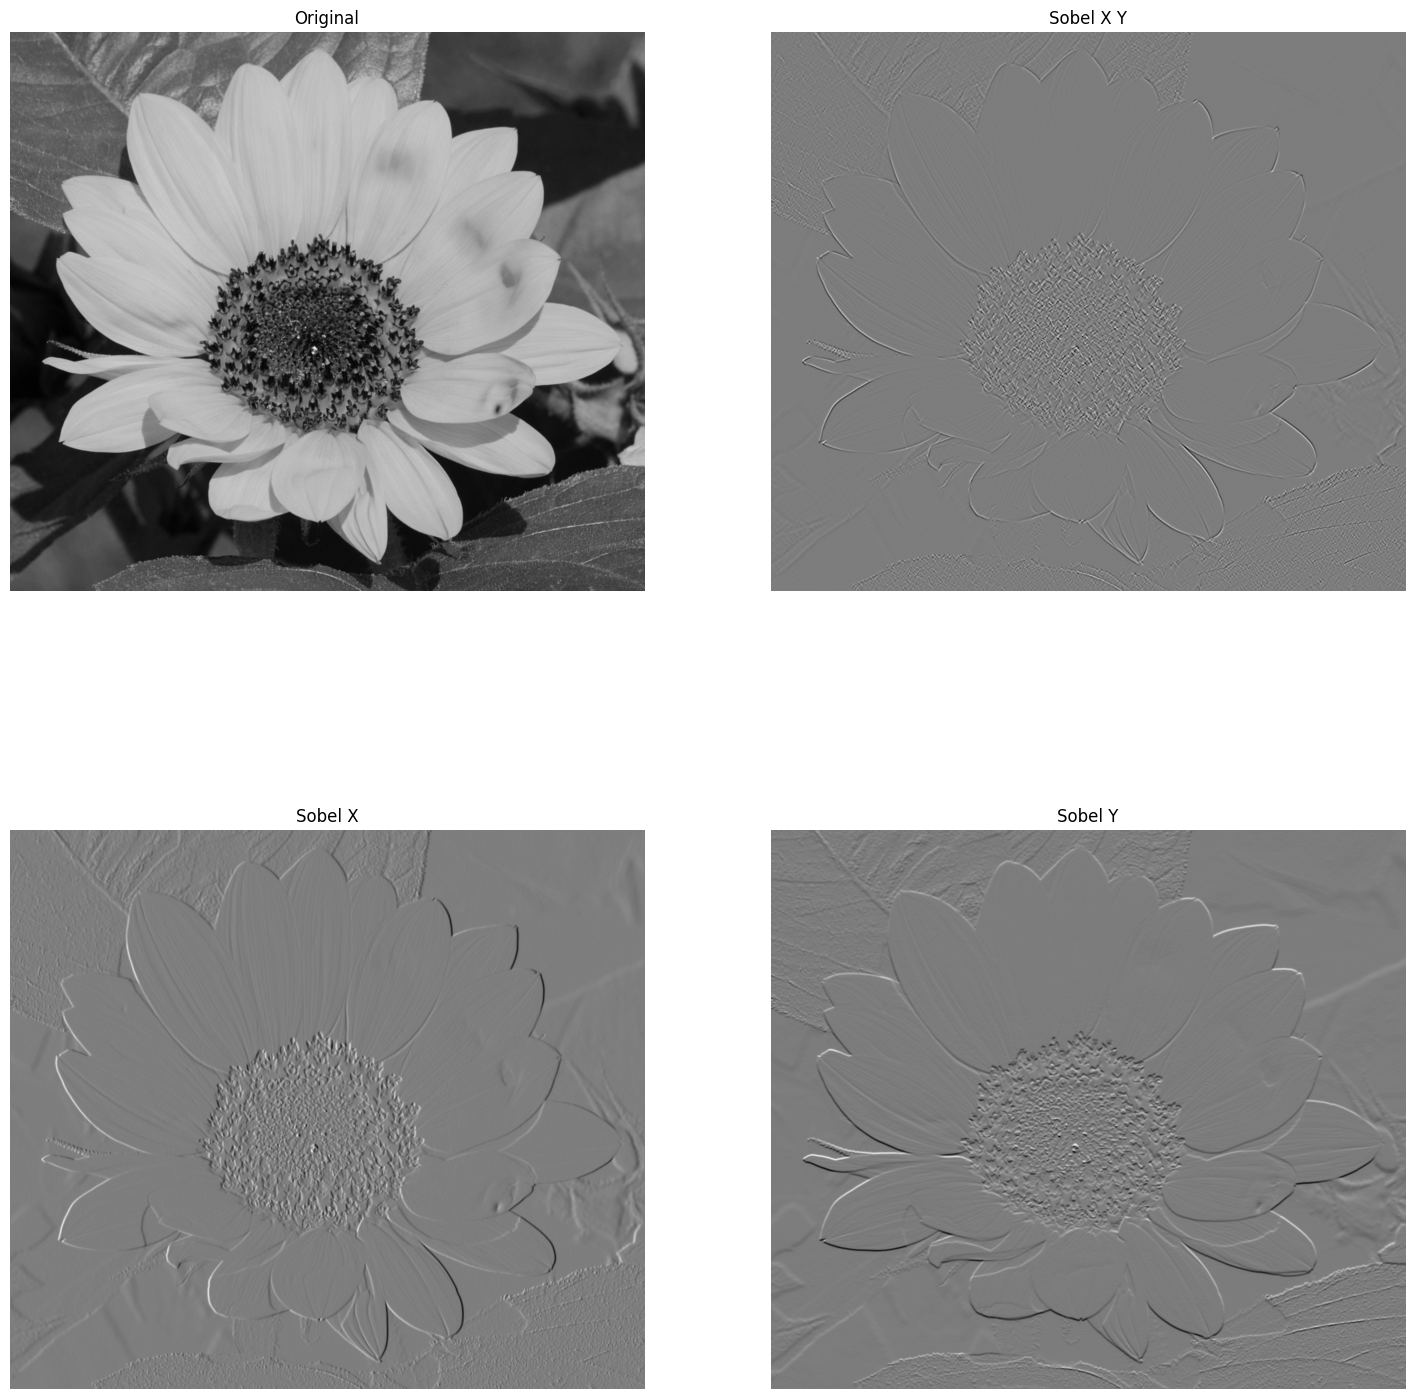

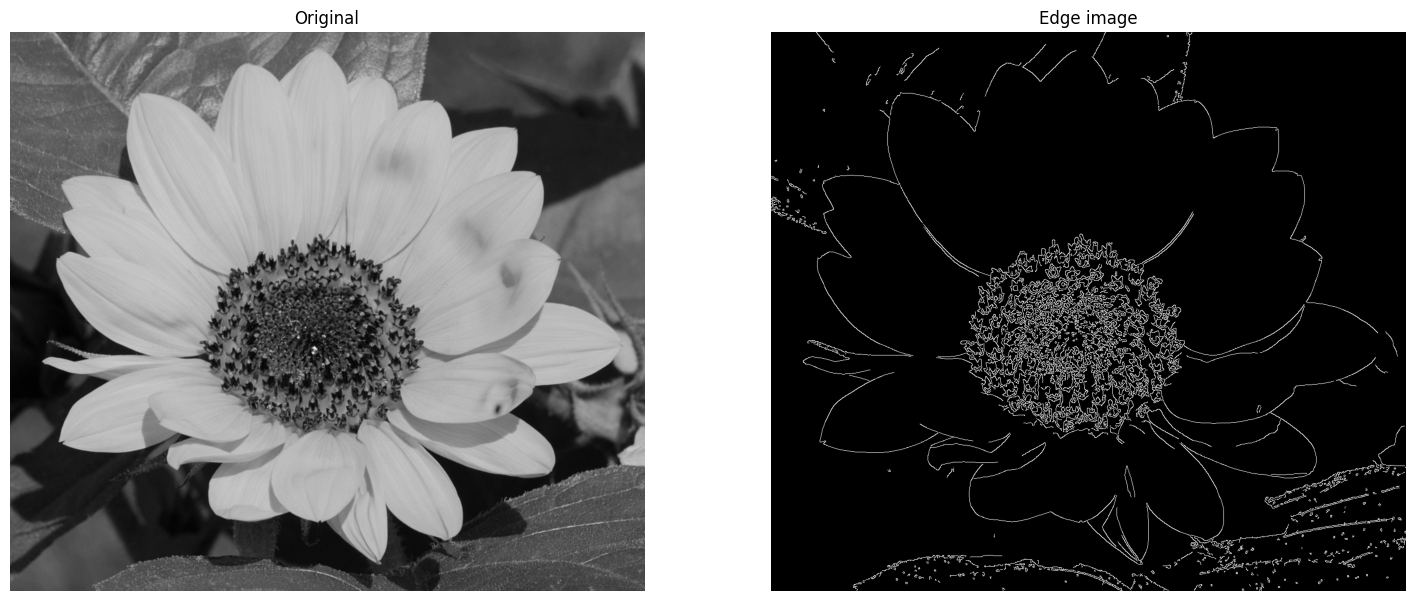

In [13]:
img = cv2.imread('download.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.GaussianBlur(img_gray,(3,3),0)
 
    
sobelx = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) 

sobely = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)

sobelxy = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)

plt.figure(figsize=(18,19))
plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.title('Original') 
plt.axis("off")

plt.subplot(222)
plt.imshow(sobelxy, cmap='gray')
plt.title('Sobel X Y') 
plt.axis("off")

plt.subplot(223)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X') 
plt.axis("off")

plt.subplot(224)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y')
plt.axis("off")

edges = cv2.Canny(image=img, threshold1=100, threshold2=200)

plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original') 
plt.axis("off")

plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title('Edge image')
plt.axis("off")